In [91]:
import pandas as pd
import xlrd
import numpy as np
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
import plotly.io as pio
from random import randint
import plotly.graph_objs as go 
import chart_studio.plotly as py
import plotly.express as px
from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_excel('Oil_Production_-_After_1980_states.xls',sheet_name="Data 1")

In [3]:
# df.columns = df.iloc[1]

In [4]:
df.shape

(499, 33)

In [5]:
df.head()

,Date,FL,NY,PA,VA,WV,IL,IA,KS,KY,...,TX,CO,ID,MT,UT,WY,AK,AZ,CA,NV
0,1981-01-15,3606,71,317,1,248,2000,438,5151,486,...,80609,2506,NaN,2416,2150,11089,49789,28,30297,69
1,1981-02-15,3162,68,286,1,234,1775,374,4727,465,...,72591,2255,NaN,2342,2170,10016,45346,24,27455,56
2,1981-03-15,3167,71,317,1,316,1960,435,5546,531,...,80734,2527,NaN,2592,2150,11089,50150,23,30515,58
3,1981-04-15,3064,69,306,1,241,2040,402,5524,555,...,77344,2478,NaN,2501,2160,10731,48235,28,29540,57
4,1981-05-15,3052,71,317,1,294,2095,400,5400,530,...,79890,2498,NaN,2626,2150,11089,48977,30,31203,56


In [109]:
df.describe()

,FL,NY,PA,VA,WV,IL,IA,KS,KY,MI,...,CO,ID,MT,UT,WY,AK,AZ,CA,NV,mean
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,...,499.000000,187.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,496.280561,32.362725,299.068136,1.312625,385.074148,1230.314629,221.681363,3786.008016,320.577154,1040.400802,...,4414.492986,2.609626,1955.667335,2198.949900,6797.761523,33534.198397,7.170341,21725.088176,95.729459,6005.224489
std,559.977016,19.638569,143.098400,1.091433,421.365371,585.802871,104.582555,1141.742030,165.430580,744.959830,...,4145.178076,5.146511,509.287700,716.243743,2124.181517,16542.340775,6.697497,6201.197177,97.398351,1849.946126
min,45.000000,9.000000,86.000000,0.000000,85.000000,340.000000,62.000000,1475.000000,14.000000,145.000000,...,1291.000000,0.000000,1149.000000,1032.000000,3966.000000,10829.000000,0.000000,9587.000000,1.000000,3261.906250
25%,171.000000,18.000000,197.000000,1.000000,143.500000,782.500000,150.500000,2888.500000,202.000000,490.500000,...,2137.000000,0.000000,1487.000000,1619.000000,4716.500000,16834.000000,3.000000,16790.000000,31.000000,4148.193548
50%,337.000000,27.000000,251.000000,1.000000,184.000000,973.000000,183.000000,3451.000000,271.000000,635.000000,...,2498.000000,0.000000,1913.000000,2123.000000,6432.000000,29906.000000,5.000000,21667.000000,47.000000,6016.161290
75%,538.500000,35.000000,398.500000,2.000000,320.000000,1610.000000,251.500000,4560.000000,445.500000,1495.500000,...,3716.000000,2.000000,2409.500000,2824.000000,8581.000000,50728.500000,9.000000,26342.500000,123.500000,7477.806452
max,3606.000000,96.000000,686.000000,6.000000,1842.000000,2726.000000,638.000000,6746.000000,725.000000,2919.000000,...,17617.000000,26.000000,3131.000000,3877.000000,11542.000000,64668.000000,35.000000,34258.000000,376.000000,10641.281250


In [7]:
df.info

<bound method DataFrame.info of           Date    FL  NY   PA  VA    WV    IL   IA    KS   KY  ...      TX  \
0   1981-01-15  3606  71  317   1   248  2000  438  5151  486  ...   80609   
1   1981-02-15  3162  68  286   1   234  1775  374  4727  465  ...   72591   
2   1981-03-15  3167  71  317   1   316  1960  435  5546  531  ...   80734   
3   1981-04-15  3064  69  306   1   241  2040  402  5524  555  ...   77344   
4   1981-05-15  3052  71  317   1   294  2095  400  5400  530  ...   79890   
..         ...   ...  ..  ...  ..   ...   ...  ...   ...  ...  ...     ...   
494 2022-03-15   122  12  485   1  1523   625  136  2402  303  ...  154266   
495 2022-04-15   122  22  417   0  1402   578  140  2394  165  ...  150468   
496 2022-05-15   124  23  423   0  1357   593  146  2465  137  ...  153951   
497 2022-06-15    67  22  408   0  1238   590  169  2421  109  ...  148874   
498 2022-07-15   106  23  398   0  1406   553  137  2518  395  ...  155149   

        CO   ID    MT    UT    

In [8]:
df.head()

,Date,FL,NY,PA,VA,WV,IL,IA,KS,KY,...,TX,CO,ID,MT,UT,WY,AK,AZ,CA,NV
0,1981-01-15,3606,71,317,1,248,2000,438,5151,486,...,80609,2506,NaN,2416,2150,11089,49789,28,30297,69
1,1981-02-15,3162,68,286,1,234,1775,374,4727,465,...,72591,2255,NaN,2342,2170,10016,45346,24,27455,56
2,1981-03-15,3167,71,317,1,316,1960,435,5546,531,...,80734,2527,NaN,2592,2150,11089,50150,23,30515,58
3,1981-04-15,3064,69,306,1,241,2040,402,5524,555,...,77344,2478,NaN,2501,2160,10731,48235,28,29540,57
4,1981-05-15,3052,71,317,1,294,2095,400,5400,530,...,79890,2498,NaN,2626,2150,11089,48977,30,31203,56


In [9]:
df_dt = df.groupby(['Date', 'FL'])

In [10]:
# print(df_dt)

In [11]:
dates = df.Date

In [12]:
states = df.columns

In [13]:
dates[:10]

0   1981-01-15
1   1981-02-15
2   1981-03-15
3   1981-04-15
4   1981-05-15
5   1981-06-15
6   1981-07-15
7   1981-08-15
8   1981-09-15
9   1981-10-15
Name: Date, dtype: datetime64[ns]

In [14]:
df.drop('Date', axis = 1, inplace = True)

In [15]:
colist = []
for col in df.columns:
    colist.append(df[col])

In [16]:
len(colist)

32

In [17]:
dataa = pd.concat(colist, axis = 0)

In [18]:
type(dataa)

pandas.core.series.Series

In [19]:
# for item in states:
#     print(item)

In [20]:
len(states) - 1

32

In [21]:
len(dataa)

15968

In [22]:
print(dataa)

0      3606.0
1      3162.0
2      3167.0
3      3064.0
4      3052.0
        ...  
494      20.0
495      16.0
496      18.0
497      22.0
498      22.0
Length: 15968, dtype: float64


In [23]:
print(dataa[:10])

0    3606.0
1    3162.0
2    3167.0
3    3064.0
4    3052.0
5    2856.0
6    2833.0
7    2650.0
8    2612.0
9    2709.0
dtype: float64


In [24]:
print(dates)

0     1981-01-15
1     1981-02-15
2     1981-03-15
3     1981-04-15
4     1981-05-15
         ...    
494   2022-03-15
495   2022-04-15
496   2022-05-15
497   2022-06-15
498   2022-07-15
Name: Date, Length: 499, dtype: datetime64[ns]


In [25]:
states_list = []
dates_list = []
for i in range(0,15968, 499):
    x = (i//499) + 1
    for k in range(499):
        states_list.append(states[x])
for i in range(32):
    for i in range(0, 499):
        dates_list.append(dates[i])

In [26]:
# dates_list

In [27]:
st_df = pd.DataFrame([states_list,dates_list, dataa])

In [28]:
st_df = st_df.transpose()

In [29]:
st_df.to_excel('stacked_states.xlsx')

In [30]:
st_df.head()

,0,1,2
0,FL,1981-01-15,3606.0
1,FL,1981-02-15,3162.0
2,FL,1981-03-15,3167.0
3,FL,1981-04-15,3064.0
4,FL,1981-05-15,3052.0


In [31]:
df.head()

,FL,NY,PA,VA,WV,IL,IA,KS,KY,MI,...,TX,CO,ID,MT,UT,WY,AK,AZ,CA,NV
0,3606,71,317,1,248,2000,438,5151,486,2827,...,80609,2506,NaN,2416,2150,11089,49789,28,30297,69
1,3162,68,286,1,234,1775,374,4727,465,2493,...,72591,2255,NaN,2342,2170,10016,45346,24,27455,56
2,3167,71,317,1,316,1960,435,5546,531,2807,...,80734,2527,NaN,2592,2150,11089,50150,23,30515,58
3,3064,69,306,1,241,2040,402,5524,555,2720,...,77344,2478,NaN,2501,2160,10731,48235,28,29540,57
4,3052,71,317,1,294,2095,400,5400,530,2763,...,79890,2498,NaN,2626,2150,11089,48977,30,31203,56


In [32]:
df.index = dates_list[:499]

In [33]:

init_notebook_mode(connected=True)
# Allows us to use cufflinks offline
cf.go_offline()

l_plots = df.iplot(xTitle = 'Years ', yTitle = 'Oil Production(in thousands of barrels)')
plt.show()
plt.savefig('line_plots.png')

<Figure size 432x288 with 0 Axes>

In [34]:
# pio.write_image(l_plots, 'oil_lineplots.svg')

In [35]:
df.iplot(kind  = 'surface',xTitle = 'Years',yTitle = 'States', zTitle = 'Oil Production (in thousands of barrels)')

In [36]:
df.iplot(kind='box')

In [37]:

# color = ['royalblue', 'green', 'mediumspringgreen', 'orange', 'red', 'yellow'
# , 'cyan', 'deeppink', 'magenta', 'indigo', 'deepskyblue', 'gold'
# , 'darkgoldenrod', 'lightcoral', 'turquoise', 'lime', 'purple', 
# 'olive', 'brown', 'black', 'chocolate', 'teal', 'tan', 'beige',
# 'steelblue', 'slategrey', 'orchid', 'crimson', 'palevioletred', 'lawngreen',
# 'orangered', 'darkslategrey']

In [111]:
df.iplot(kind = 'bar', xTitle = 'Years', yTitle = 'Oil Production (in thousands of barrels)')

<AxesSubplot:>

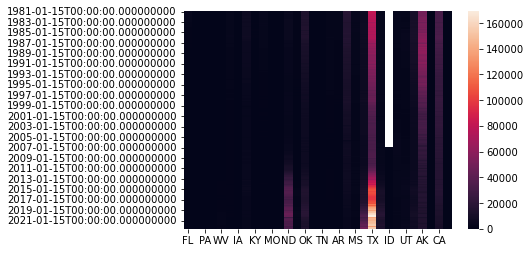

In [39]:
sns.heatmap(df)

In [40]:
nona_df =  df.dropna()

In [41]:
tx = nona_df.TX

In [42]:
# nona_df.drop(['TX'], axis = 1,  inplace = True)

In [57]:
x_train , x_test , y_train , y_test =train_test_split(nona_df,tx, test_size = 0.3)

In [58]:
train = tx[tx.index < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
test = tx[tx.index > pd.to_datetime("2020-11-01", format='%Y-%m-%d')]

In [59]:
nona_df =  df.dropna()

In [60]:
lin_mdl = LinearRegression(normalize=True)


In [62]:
lin_mdl.fit(x_train, y_train)

LinearRegression(normalize=True)

In [63]:
preds = lin_mdl.predict(x_test)


In [64]:
new_dates_list = tx[tx.index > pd.to_datetime("2017-11-01", format='%Y-%m-%d')]

In [65]:
preds_srs = pd.DataFrame(preds)

In [66]:
tx.iplot()

In [67]:
preds_srs.iplot()

In [68]:
st_avgs = dict()

for item in df.columns:
    st_avgs[item] = np.mean(df[item])

In [76]:
st_avgs_std = {k: v for k, v in sorted(st_avgs.items(), key=lambda item: item[1], reverse = True)}

In [96]:
st_avgs_std

{'TX': 65848.5751503006,
 'AK': 33534.19839679359,
 'CA': 21725.088176352707,
 'ND': 11241.905811623246,
 'OK': 9501.649298597195,
 'NM': 9268.875751503007,
 'LA': 9044.10621242485,
 'WY': 6797.761523046092,
 'CO': 4414.492985971944,
 'KS': 3786.008016032064,
 'UT': 2198.9498997995993,
 'MT': 1955.6673346693387,
 'MS': 1900.8957915831663,
 'IL': 1230.314629258517,
 'AL': 1048.2064128256513,
 'MI': 1040.4008016032064,
 'OH': 942.3847695390782,
 'AR': 757.4248496993988,
 'FL': 496.2805611222445,
 'WV': 385.0741482965932,
 'KY': 320.57715430861725,
 'NE': 312.8557114228457,
 'PA': 299.0681362725451,
 'IA': 221.6813627254509,
 'SD': 118.13426853707415,
 'NV': 95.72945891783567,
 'TN': 35.210420841683366,
 'NY': 32.362725450901806,
 'MO': 10.90380761523046,
 'AZ': 7.170340681362726,
 'ID': 2.609625668449198,
 'VA': 1.312625250501002}

In [100]:
ys =  [float(i) for i in st_avgs_std.values()]

xs = list(st_avgs_std.keys())

In [108]:
fig = px.bar(x = st_avgs_std.keys(), y = ys, color = xs,
             title = 'States Average Monthly Production (in thousands of barrels)')
fig.show()

In [70]:
df.head()

,FL,NY,PA,VA,WV,IL,IA,KS,KY,MI,...,TX,CO,ID,MT,UT,WY,AK,AZ,CA,NV
1981-01-15,3606,71,317,1,248,2000,438,5151,486,2827,...,80609,2506,NaN,2416,2150,11089,49789,28,30297,69
1981-02-15,3162,68,286,1,234,1775,374,4727,465,2493,...,72591,2255,NaN,2342,2170,10016,45346,24,27455,56
1981-03-15,3167,71,317,1,316,1960,435,5546,531,2807,...,80734,2527,NaN,2592,2150,11089,50150,23,30515,58
1981-04-15,3064,69,306,1,241,2040,402,5524,555,2720,...,77344,2478,NaN,2501,2160,10731,48235,28,29540,57
1981-05-15,3052,71,317,1,294,2095,400,5400,530,2763,...,79890,2498,NaN,2626,2150,11089,48977,30,31203,56


In [71]:
df['mean'] = np.mean(df, axis = 1)

In [107]:
df['mean'].iplot(xTitle = 'Years', yTitle = 'Total States Oil Production (in thousands of barrels)')